# Resume Classification Pipeline
This notebook performs preprocessing and classification on a resume dataset.

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import fitz

In [19]:
# Load the dataset
df = pd.read_csv("filtered_data.csv")
df.head()


,Unnamed: 0,Category,Resume,Resume_length,Normalized_Resume,Tokenized_Lemmatized_Resume,Extracted_Features,Cluster_Labels
0,0,Data Science,Skills * Programming Languages: Python (pandas...,4786,Skills Programming Languages Python pandas num...,"['Skills', 'Programming', 'Languages', 'Python...","['Languages', 'Python', 'Sql', 'Java', 'JavaSc...",7
1,1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,1268,Education Details May to May BE UITRGPV Data S...,"['Education', 'Details', 'May', 'to', 'May', '...","['May', 'May', 'BE', 'UITRGPV', 'Data', 'Scien...",0
2,2,Data Science,"Areas of Interest Deep Learning, Control Syste...",1871,Areas of Interest Deep Learning Control System...,"['Areas', 'of', 'Interest', 'Deep', 'Learning'...","['Interest', 'Deep', 'Learning', 'Control', 'S...",0
3,3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,6995,Skills R Python SAP HANA Tableau SAP HANA SQL ...,"['Skills', 'R', 'Python', 'SAP', 'HANA', 'Tabl...","['Skills', 'R', 'Python', 'SAP', 'HANA', 'Tabl...",3
4,4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",452,Education Details MCA YMCAUST Faridabad Haryan...,"['Education', 'Details', 'MCA', 'YMCAUST', 'Fa...","['Details', 'MCA', 'YMCAUST', 'Faridabad', 'Ha...",0


In [20]:
# Encode target labels
le = LabelEncoder()
df['Category_encoded'] = le.fit_transform(df['Category'])
labels = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", labels)


Label Mapping: {'Advocate': np.int64(0), 'Arts': np.int64(1), 'Automation Testing': np.int64(2), 'Blockchain': np.int64(3), 'Business Analyst': np.int64(4), 'Civil Engineer': np.int64(5), 'Data Science': np.int64(6), 'Database': np.int64(7), 'DevOps Engineer': np.int64(8), 'DotNet Developer': np.int64(9), 'ETL Developer': np.int64(10), 'Electrical Engineering': np.int64(11), 'HR': np.int64(12), 'Hadoop': np.int64(13), 'Health and fitness': np.int64(14), 'Java Developer': np.int64(15), 'Mechanical Engineer': np.int64(16), 'Network Security Engineer': np.int64(17), 'Operations Manager': np.int64(18), 'PMO': np.int64(19), 'Python Developer': np.int64(20), 'SAP Developer': np.int64(21), 'Sales': np.int64(22), 'Testing': np.int64(23), 'Web Designing': np.int64(24)}


In [21]:
# Vectorize using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Normalized_Resume'])
y = df['Category_encoded']


In [22]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [23]:
# Try different models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear')
}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, preds, target_names=le.classes_))



Training Naive Bayes...

Naive Bayes Classification Report:
                           precision    recall  f1-score   support

                 Advocate       0.00      0.00      0.00         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       1.00      0.40      0.57         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      0.50      0.67         6
           Civil Engineer       1.00      0.60      0.75         5
             Data Science       1.00      0.50      0.67         8
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       0.77      0.91      0.83        11
         DotNet Developer       1.00      0.20      0.33         5
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00         9


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",


Logistic Regression Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       0.83      1.00      0.91         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00         8
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00         9
                 

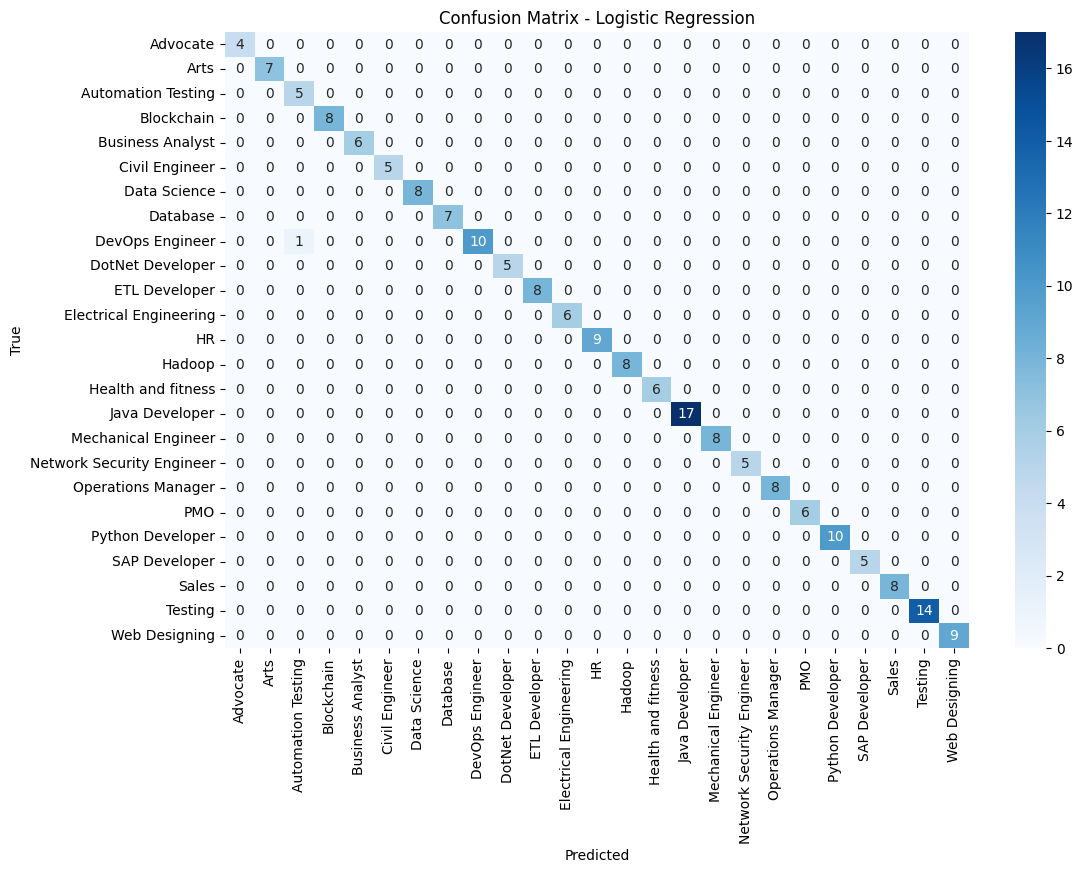

In [24]:
# Plot confusion matrix for Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
preds = model.predict(X_test)

cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import load_iris

# Load dataset (using Iris dataset as an example)
data = load_iris()
X, y = data.data, data.target
le = LabelEncoder()
y = le.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, preds, target_names=data.target_names))
    accuracy = accuracy_score(y_test, preds)
    print(f"Accuracy for {name}: {accuracy:.4f}")



Training Logistic Regression...

Logistic Regression Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy for Logistic Regression: 1.0000

Training SVM...

SVM Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy for SVM: 1.0000

Training Naive Bayes...

Naive Bayes Classificati

In [26]:
from sklearn.linear_model import LogisticRegression

# Sample resume text (you can replace this with any resume content)
sample_resume = '''
Experienced Data Scientist with a strong background in Python, Machine Learning, and Data Visualization.
Skilled in data preprocessing, model building, and deploying models using Flask and Docker.
Proficient with libraries such as Pandas, NumPy, Scikit-learn, and TensorFlow.
'''

# Vectorize the resume using the same TF-IDF vectorizer
sample_vectorized = tfidf.transform([sample_resume])

# Train (or reuse) the best model – assuming Logistic Regression for demo
best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train, y_train)

# Make a prediction
sample_pred = best_model.predict(sample_vectorized)

# Decode predicted label
predicted_category = le.inverse_transform(sample_pred)[0]
print(f"Predicted Category: {predicted_category}")


ValueError: X has 5000 features, but LogisticRegression is expecting 4 features as input.

In [ ]:
import pickle

# Train your best model again (if needed)
best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train, y_train)

# Save the TF-IDF vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

# Save the trained classifier model
with open("classifier_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# Save the label encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

print("✅ All components saved")


✅ All components saved


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import load_iris

# Load dataset (using Iris dataset as an example)
data = load_iris()
X, y = data.data, data.target
le = LabelEncoder()
y = le.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, preds, target_names=data.target_names))
    accuracy = accuracy_score(y_test, preds)
    print(f"Accuracy for {name}: {accuracy:.4f}")



Training Logistic Regression...

Logistic Regression Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy for Logistic Regression: 1.0000

Training SVM...

SVM Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy for SVM: 1.0000

Training Naive Bayes...

Naive Bayes Classificati